<a href="https://colab.research.google.com/github/kevinpatelco/Stock_Prediction/blob/master/MA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
!pip install alpha_vantage
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.2)


In [0]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np

from sklearn import linear_model 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Activation, AveragePooling1D, Flatten
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error

#Data Processing

In [0]:
ts = TimeSeries(key='HE5QFT0CZ49ZBE85', output_format='pandas')

#Add values to SPY_data Variable
SPY_data, SPY_meta_data = ts.get_daily(symbol='SPY', outputsize='full')

#Add values to SPX_data Variable
SPX_data, SPX_meta_data= ts.get_daily(symbol='SPX', outputsize='full')
# pprint(SPY_data)



In [0]:
'''Simple Moving Average'''

ti = TechIndicators(key='HE5QFT0CZ49ZBE85', output_format='pandas')

#SPX
spx_sma9 = ti.get_sma(symbol='SPX', interval='daily', time_period=9, series_type='close')
spx_sma13 = ti.get_sma(symbol='SPX', interval='daily', time_period=13, series_type='close')
spx_sma50 = ti.get_sma(symbol='SPX', interval='daily', time_period=50, series_type='close')

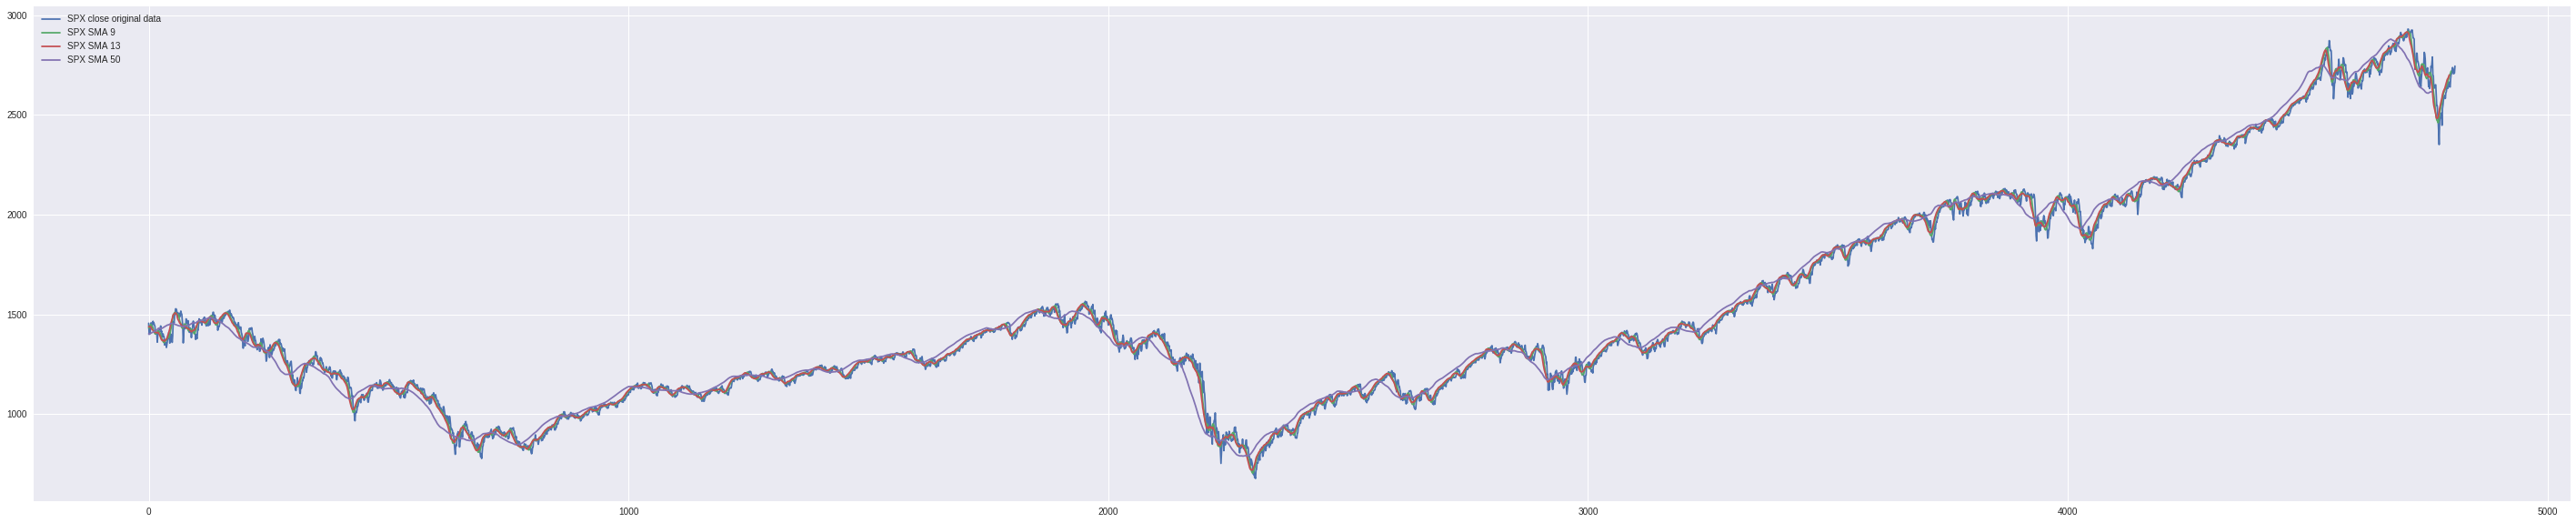

In [52]:
#SPX SMA PLOT
plt.figure(figsize= (50, 10))
plt.plot(SPX_data['4. close'].values)
plt.plot(spx_sma9[0].values)
plt.plot(spx_sma13[0].values)
plt.plot(spx_sma50[0].values)

plt.legend(['SPX close original data', 'SPX SMA 9', 'SPX SMA 13', 'SPX SMA 50'])

In [0]:
#SPY
spy_sma9 = ti.get_sma(symbol='SPY', interval='daily', time_period=9, series_type='close')
spy_sma13 = ti.get_sma(symbol='SPY', interval='daily', time_period=13, series_type='close')
spy_sma50 = ti.get_sma(symbol='SPY', interval='daily', time_period=50, series_type='close')

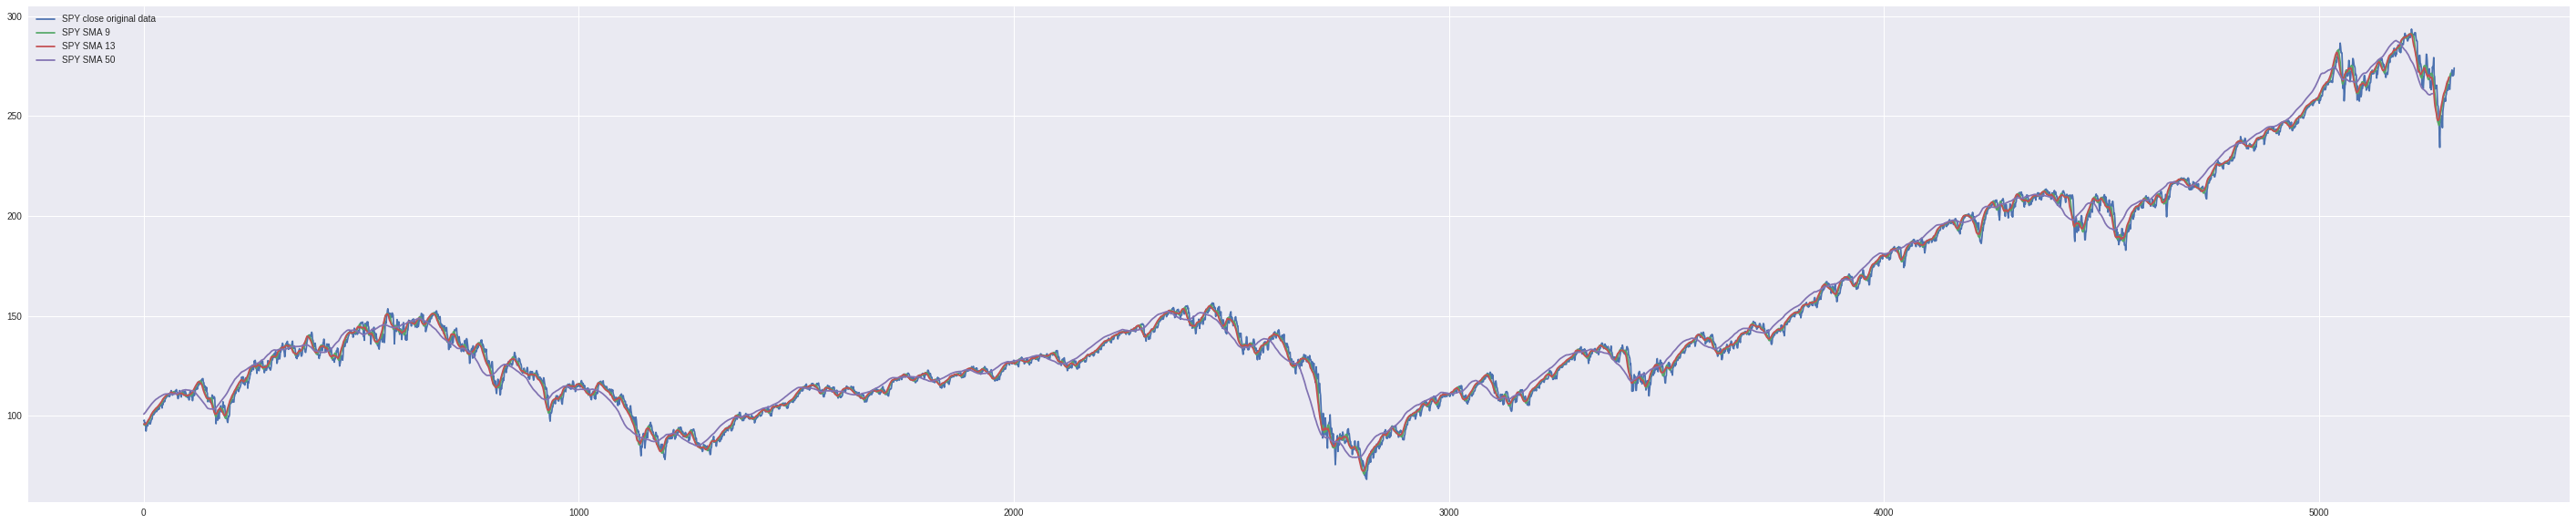

In [63]:
#SPY SMA PLOT
plt.figure(figsize= (50, 10))
plt.plot(SPY_data['4. close'].values)
plt.plot(spy_sma9[0].values)
plt.plot(spy_sma13[0].values)
plt.plot(spy_sma50[0].values)

plt.legend(['SPY close original data', 'SPY SMA 9', 'SPY SMA 13', 'SPY SMA 50'])

By looking at the graphs we can see that, SMA 50 line would be the first one to show an uptrend or a downtrend as it shows the deviation before any other MA lines.

In [0]:
'''Exponential Moving Average'''

#SPX
spx_ema9 = ti.get_ema(symbol='SPX', interval='daily', time_period=9, series_type='close')
spx_ema13 = ti.get_ema(symbol='SPX', interval='daily', time_period=13, series_type='close')
spx_ema50 = ti.get_ema(symbol='SPX', interval='daily', time_period=50, series_type='close')

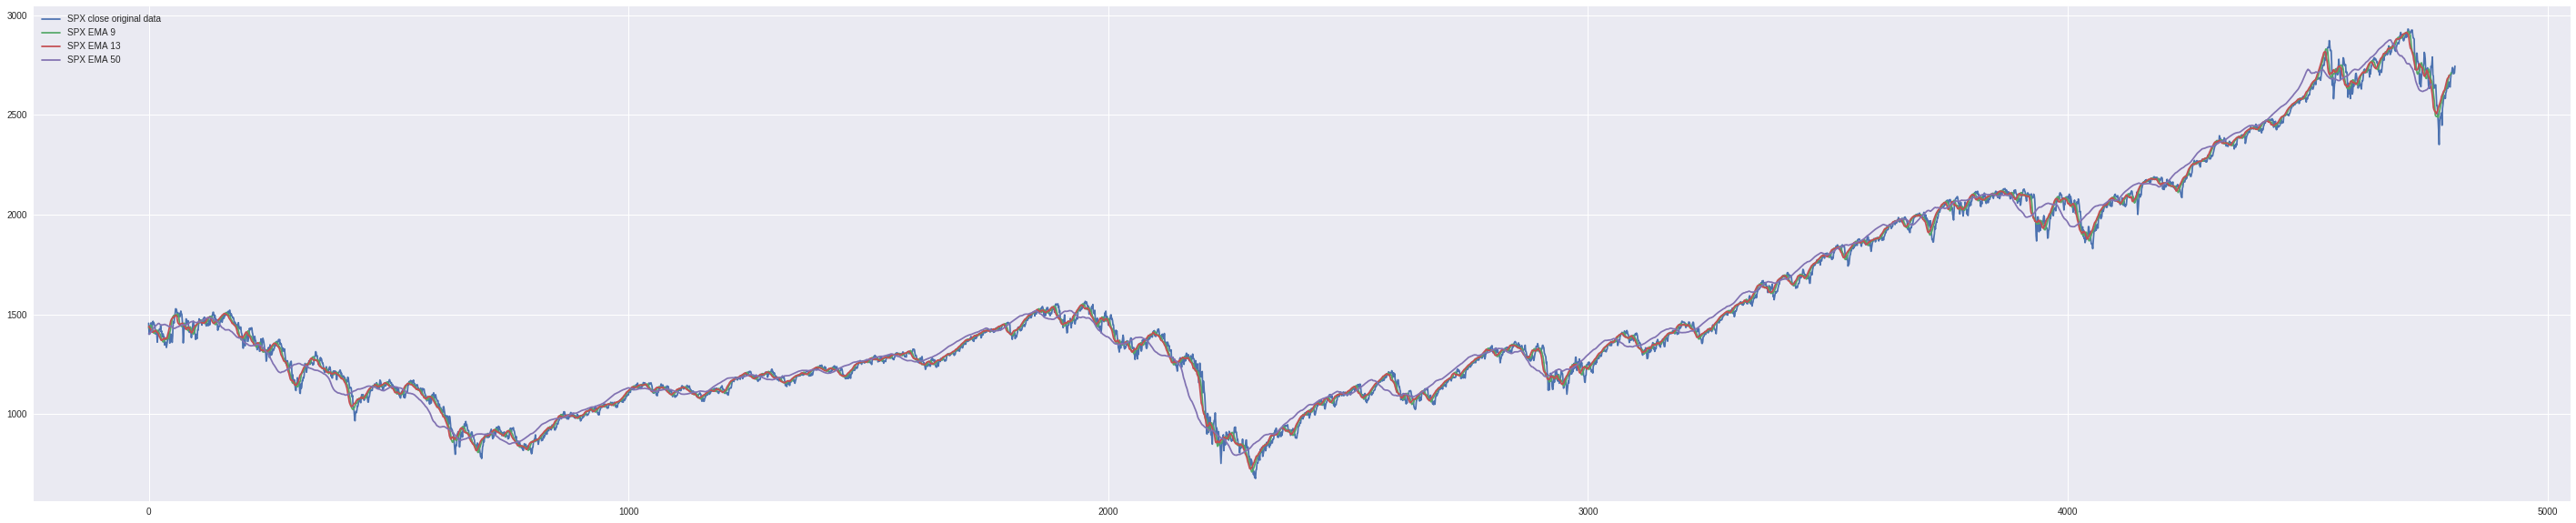

In [76]:
#SPX EMA PLOT
plt.figure(figsize= (50, 10))
plt.plot(SPX_data['4. close'].values)
plt.plot(spx_ema9[0].values)
plt.plot(spx_ema13[0].values)
plt.plot(spx_ema50[0].values)

plt.legend(['SPX close original data', 'SPX EMA 9', 'SPX EMA 13', 'SPX EMA 50'])

In [0]:
#SPY
spy_ema9 = ti.get_ema(symbol='SPY', interval='daily', time_period=9, series_type='close')
spy_ema13 = ti.get_ema(symbol='SPY', interval='daily', time_period=13, series_type='close')
spy_ema50 = ti.get_ema(symbol='SPY', interval='daily', time_period=50, series_type='close')

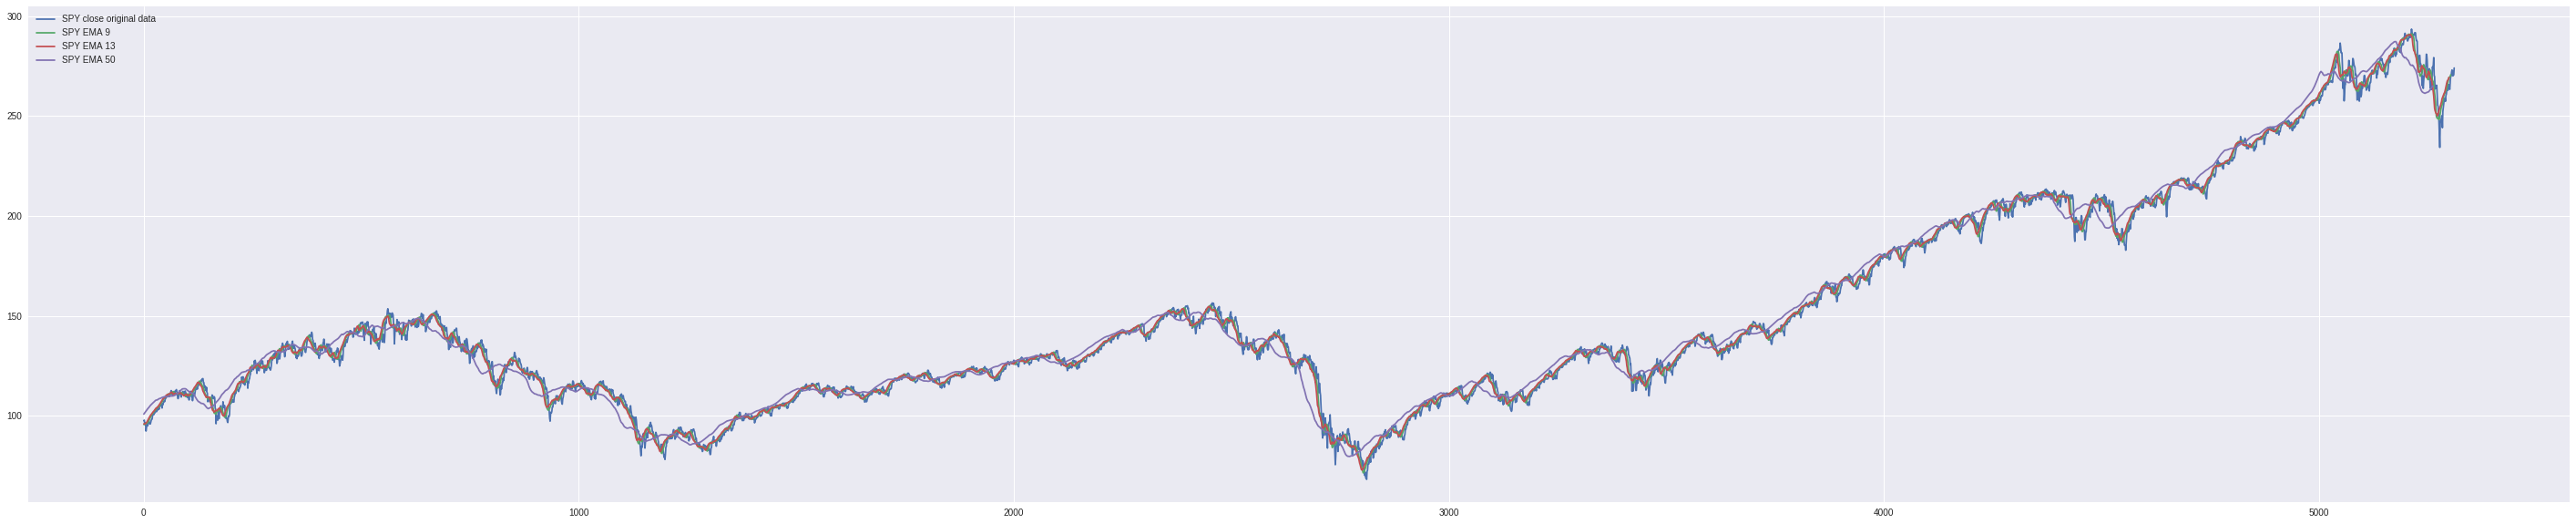

In [83]:
#SPY EMA PLOT
plt.figure(figsize= (50, 10))
plt.plot(SPY_data['4. close'].values)
plt.plot(spy_ema9[0].values)
plt.plot(spy_ema13[0].values)
plt.plot(spy_ema50[0].values)

plt.legend(['SPY close original data', 'SPY EMA 9', 'SPY EMA 13', 'SPY EMA 50'])

In [0]:
# df = SPX_data[['4. close']]
df = SPX_data
forecast_out = int(1)

df['prediction'] = df[['4. close']].shift(-forecast_out)

In [0]:
X = np.array(df.drop(['prediction'],1))
X = preprocessing.scale(X)

In [0]:
X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

In [0]:
y = np.array(df['prediction'])
y = y[:-forecast_out]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Regression Models


##Linear Regression

In [89]:
# Training - linear regression
reg = linear_model.LinearRegression()
# reg = linear_model.Ridge(alpha = 0.1)
reg.fit(X_train,y_train)

# Testing
confidence = reg.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.9989413436385886


In [90]:
#Forecast Prediction
forecast_prediction = reg.predict(X_forecast)
print(forecast_prediction)

[2745.19243065]


##Support Vector Regression

In [91]:
#Training - SVR
reg = svm.SVR(kernel='linear', gamma='scale', C=1.0, epsilon=0.1)
reg.fit(X_train, y_train)

#TESTING
confidence = reg.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.9987506457106603


In [92]:
#Forecast Prediction
forecast_prediction = reg.predict(X_forecast)
print(forecast_prediction)

[2735.37920086]


##KNN Regressor

In [93]:
#Training - KNN
reg = neigh = KNeighborsRegressor(n_neighbors=9)
reg.fit(X_train, y_train)

#Testing
confidence = reg.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.9983207876595799


In [94]:
#Forecast Prediction
forecast_prediction = reg.predict(X_forecast)
print(forecast_prediction)

[2732.38112222]


##Random Forest Regressor

In [95]:
#Training - Random Forest Regressor
reg = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
reg.fit(X_train, y_train)

#Testing
confidence = reg.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.9450211191463523


In [96]:
#Forecast Prediction
forecast_prediction = reg.predict(X_forecast)
print(forecast_prediction)

[2616.0417475]


In [97]:
X_train.shape

(3845, 5)

#Neural Network Regression

##RNN - LSTM

In [0]:

# create and compile the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(5,1), return_sequences=False))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mean_squared_error", optimizer="rmsprop")

In [0]:
#Fit the model
model.fit(X_train, y_train, batch_size=700, nb_epoch=10, validation_split=0.05)  
